In [7]:
from bsm_functions import bsm_call_value

In [45]:
from time import time
from math import exp, sqrt, log
from random import gauss, seed
import numpy as np
seed(20000)
t0 = time()

In [12]:
S0=100.
K=105.
T=1.0
r=0.05
sigma=0.2
M=50 # number of time steps
dt= T/M #length of time interval
I= 250000 #number of paths

In [41]:
S = []
for i in range (I):
    path=[]
    for t in range (M+1):
        if t==0:
            path.append(S0)
        else:
            z = gauss(0.0, 1.0)
            St = path[t-1]*exp((r - 0.5*sigma**2)*dt + sigma*sqrt(dt)*z)
            path.append(St)
    S.append(path)
    
# calculating the monte carlo estimator
C0 = exp(-r * T) * sum([max(path[-1] - K, 0) for path in S]) / I
# her M sayıda intervalin en sonunda oluşan S rakamı için (250000)
# bir tane teorik fiyat oluşturduk S'in içindeki her listin sonundaki rakam için
# tabi daha sonra bunun ortalamasını bulmamız gerekiyor I kez denediğimiz için

In [43]:
round(C0,3)

8.048

In [68]:
# Vectorization with NumPy

import math
S = np.zeros((M + 1, I))
S[0] = S0
for t in range(1, M + 1):
    z = np.random.standard_normal(I) # pseudorandom numbers
    S[t] = S[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * math.sqrt(dt) * z)
# vectorized operation per time step over all paths
# Calculating the Monte Carlo estimator
C0 = math.exp(-r * T) * np.sum(np.maximum(S[-1] - K, 0)) / I

In [87]:
# Full Vectorization with Log Euler Scheme

import math
from numpy import *
S = S0 * exp(cumsum((r - 0.5 * sigma ** 2) * dt + sigma * math.sqrt(dt) * random.standard_normal((M + 1, I)), axis=0))
# sum instead of cumsum would also do
# if only the final values are of interest
S[0] = S0

In [88]:
# GRAPHICAL ANALYSIS

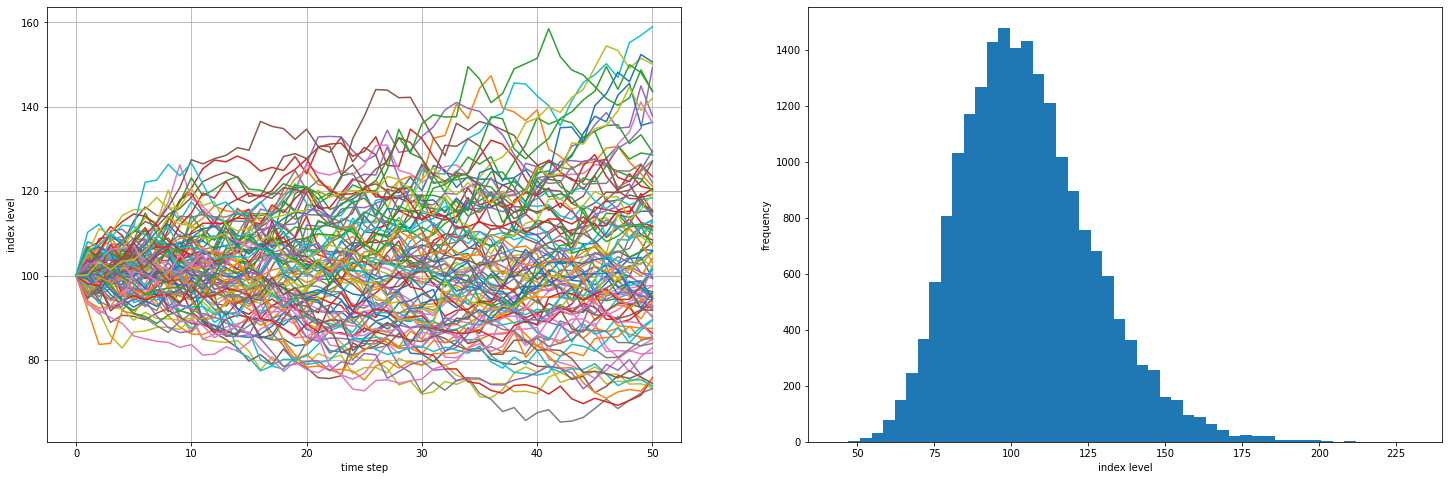

<Figure size 432x288 with 0 Axes>

In [156]:
import matplotlib.pyplot as plt
f = plt.figure(figsize=(25,8))
ax = f.add_subplot(121)
ax.plot(S[:,:100])
ax.grid(True)
plt.xlabel('time step')
plt.ylabel('index level')
ax1 = f.add_subplot(122)
ax1.hist(S[-1,:20000], bins=50)
plt.xlabel('index level') #ikisi de oluyor iyi bak 
ax1.set_ylabel('frequency')
plt.figure();

In [145]:
a = np.zeros([5,2])
a = np.random.standard_normal((5,2))